# This Notebook uses RSEM coutns

In [1]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)

In [6]:
library(dplyr)
library(tidyverse)
library(WriteXLS)
library(stringr)

In [7]:
library(DESeq2)
library(apeglm)
library(EnhancedVolcano)
library(ggplot2)

In [8]:
quadroot <- function (x) { # function to help decrease range of read counts. Easier for heatmap visulization
    return(x^(1/4))
}

In [9]:
library(pheatmap)

In [10]:
setwd('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/')

In [11]:
list.files('.', c('csv'))

[1] "conditions_group1.csv"                
 [2] "conditions_group2.csv"                
 [3] "conditions_group3.csv"                
 [4] "Day4_WT_vs_ZBTB18_KO_sigGenes.csv"    
 [5] "ES_WT_vs_ZBTB18_KO_Sig_Genes.csv"     
 [6] "FoldChangeByTimePoints.csv"           
 [7] "HitGeneCount.csv"                     
 [8] "HitGeneCountMM.csv"                   
 [9] "HS_td-VStd+_td-VSdox120.csv"          
[10] "intersection_output.csv"              
[11] "Mouse ESC screen.csv"                 
[12] "plot_screen_data_sqrt.csv"            
[13] "plot_screen_data.csv"                 
[14] "plot_screenMM_data.csv"               
[15] "RCmNorRatioLog2.lu.csv"               
[16] "RNASeqSampleNames.csv"                
[17] "rsem_counts_B1B2_combined.csv"        
[18] "Significant_genes_DOXvsES.csv"        
[19] "Significant_genes_WTvsZBTB18KO.csv"   
[20] "TF_Screen_FC_Pval_15HvsES.csv"        
[21] "TF_Screen_FC_Pval_1DvsES.csv"         
[22] "TF_Screen_FC_Pval_2DvsES.csv"         
[23] "TF_Screen_FC_Pval_4DvsES.csv"         
[24] "TF_Screen_FC_Pval_7DvsES.csv"         
[25] "TF_ScreenSelectedNormalizedCounts.csv"
[26] "tf.heatmap.genes.csv"                 
[27] "tf.heatmap.genes.down.csv"            
[28] "tf.heatmap.genes.up.csv"              
[29] "TFlist.csv"

In [12]:
cnts <- read.csv(file = 'rsem_counts_B1B2_combined.csv')

In [13]:
cnts %>% head
cnts %>% dim

gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,TSPAN6,817.0001,966.0001,789.0001,1226.0001,757.0001,723.0001,991.0001,1400.0001,⋯,1262.0001,2215.0001,1604.0001,2076.0001,1064.0001,2301.0001,175.0001,457.0001,294.0001,584.0001
ENSG00000000005.6,TNMD,19.0001,0.0001,0.0001,11.0001,11.0001,14.0001,1.0001,11.0001,⋯,0.0001,2.0001,0.0001,0.0001,0.0001,1.0001,0.0001,0.0001,0.0001,0.0001
ENSG00000000419.12,DPM1,762.0001,731.0001,746.0001,908.0001,809.0001,644.0001,516.0001,1264.0001,⋯,853.0001,901.0001,797.0001,791.0001,345.0001,1147.0001,378.0001,400.0001,255.0001,567.0001
ENSG00000000457.14,SCYL3,20.5201,67.4201,49.0501,70.2001,28.5701,27.2601,56.7901,14.3201,⋯,0.0001,58.1201,129.1501,46.1601,82.9401,80.7301,46.0801,31.0001,111.0001,124.8201
ENSG00000000460.17,C1orf112,114.4801,211.6401,160.9501,266.8001,153.4301,145.7401,101.2101,253.6701,⋯,146.0001,165.8801,114.8501,187.8401,118.0601,126.2701,54.9201,0.0001,0.0001,1.1801
ENSG00000000938.13,FGR,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,⋯,0.0001,0.0001,0.0001,0.0001,0.0001,2.0001,0.0001,0.0001,0.0001,0.0001


[1] 60662    46

In [14]:
cnts[,3:46] <- apply(cnts[,3:46],2, as.integer) # convert rsem floating data to integer

In [15]:
cnts %>% head

gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,⋯,0,2,0,0,0,1,0,0,0,0
ENSG00000000419.12,DPM1,762,731,746,908,809,644,516,1264,⋯,853,901,797,791,345,1147,378,400,255,567
ENSG00000000457.14,SCYL3,20,67,49,70,28,27,56,14,⋯,0,58,129,46,82,80,46,31,111,124
ENSG00000000460.17,C1orf112,114,211,160,266,153,145,101,253,⋯,146,165,114,187,118,126,54,0,0,1
ENSG00000000938.13,FGR,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,2,0,0,0,0


In [16]:
cnts <- cnts %>% column_to_rownames('gene_id') 

In [17]:
str(cnts)
head(cnts)

'data.frame':	60662 obs. of  45 variables:
 $ gene_name: Factor w/ 59087 levels "A1BG","A1BG-AS1",..: 56274 55506 27106 51433 23392 28996 24837 29441 29754 40808 ...
 $ S01_B1   : int  817 19 762 20 114 0 0 229 146 168 ...
 $ S01_B2   : int  966 0 731 67 211 0 1 396 60 237 ...
 $ S02_B1   : int  789 0 746 49 160 0 0 190 177 145 ...
 $ S02_B2   : int  1226 11 908 70 266 0 0 409 330 248 ...
 $ S03_B1   : int  757 11 809 28 153 0 0 277 202 72 ...
 $ S03_B2   : int  723 14 644 27 145 0 0 140 205 206 ...
 $ S04_B1   : int  991 1 516 56 101 0 0 229 39 148 ...
 $ S04_B2   : int  1400 11 1264 14 253 0 1 523 401 194 ...
 $ S05_B1   : int  1194 0 340 65 148 0 0 313 131 292 ...
 $ S05_B2   : int  1732 14 1031 37 271 0 0 557 366 247 ...
 $ S06_B1   : int  1093 0 597 40 94 0 0 546 78 202 ...
 $ S06_B2   : int  2456 19 1772 41 361 0 4 691 579 471 ...
 $ S07_B1   : int  739 0 390 138 0 0 0 80 54 166 ...
 $ S07_B2   : int  359 0 235 29 14 0 0 69 29 91 ...
 $ S08_B1   : int  998 0 513 168 70 0 1 209 32

,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,1194,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,0,⋯,0,2,0,0,0,1,0,0,0,0
ENSG00000000419.12,DPM1,762,731,746,908,809,644,516,1264,340,⋯,853,901,797,791,345,1147,378,400,255,567
ENSG00000000457.14,SCYL3,20,67,49,70,28,27,56,14,65,⋯,0,58,129,46,82,80,46,31,111,124
ENSG00000000460.17,C1orf112,114,211,160,266,153,145,101,253,148,⋯,146,165,114,187,118,126,54,0,0,1
ENSG00000000938.13,FGR,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,2,0,0,0,0


# WT compared to ZBTB18KO, sample sheet.

Condition  |  Sample    
:---------:|:-------:
WT.ES  |  1, 2    
108.ES |   3, 4    
112.ES |   5, 6    
WT.Day4  |  7,8    
108.Day4 |   9, 10    
112.Day4 |   11, 12

# Comparison 1: ES WT vs. ES ZBTB18 knockout.

- WT.ES vs. 108.ES
- WT.ES vs. 112.ES

In [18]:
all.sample.annotation <- read.csv('RNASeqSampleNames.csv', header = F)

In [19]:
all.sample.annotation

V1,V2,V3
<fct>,<fct>,<fct>
S01_B1,WT.ES,ES
S01_B2,WT.ES,ES
S02_B1,WT.ES,ES
S02_B2,WT.ES,ES
S03_B1,K108.ES,KO.ES
S03_B2,K108.ES,KO.ES
S04_B1,K108.ES,KO.ES
S04_B2,K108.ES,KO.ES
S05_B1,K112.ES,KO.ES


In [24]:
sample_in <- all.sample.annotation %>% 
        filter(V3 %in% c('ES', 'KO.ES', 'D4', 'KO.D4') & !(str_detect(V1, 'S13') | str_detect(V1, 'S14'))) %>%
        pull(V1)

In [56]:
?which

In [25]:
sample_in

[1] S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 S05_B1 S05_B2
[11] S06_B1 S06_B2 S07_B1 S07_B2 S08_B1 S08_B2 S09_B1 S09_B2 S10_B1 S10_B2
[21] S11_B1 S11_B2 S12_B1 S12_B2
44 Levels: S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 ... S22_B2

In [26]:
# relevant samples
cols.ES <- all.sample.annotation %>% filter((V1 %in% sample_in) & str_detect(V3,'ES')) %>% pull(V1)

In [27]:
cols.ES

[1] S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 S05_B1 S05_B2
[11] S06_B1 S06_B2
44 Levels: S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 ... S22_B2

In [28]:
cnts.ES <- cnts[,cols.ES]

In [53]:
cnts.ES[which(cnts.ES$S01_B1 < 0),]

gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


In [29]:
colnames(cnts.ES)
head(cnts.ES)

[1] "gene_name" "S01_B1"    "S01_B2"    "S02_B1"    "S02_B2"    "S03_B1"   
 [7] "S03_B2"    "S04_B1"    "S04_B2"    "S05_B1"    "S05_B2"    "S06_B1"

,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,1194,1732,1093
ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,0,14,0
ENSG00000000419.12,DPM1,762,731,746,908,809,644,516,1264,340,1031,597
ENSG00000000457.14,SCYL3,20,67,49,70,28,27,56,14,65,37,40
ENSG00000000460.17,C1orf112,114,211,160,266,153,145,101,253,148,271,94
ENSG00000000938.13,FGR,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# get gene_names
gene_ids.ES = rownames_to_column(cnts.ES, 'gene_id')[,1:2] # list of gene IDs specific to ES dataset
gtf_lookup$gene_id <- as.character(gtf_lookup$gene_id)
gene_names.ES = left_join(gene_ids.ES, gtf_lookup, 'gene_id')[,c(3)] %>% as.character # join to get gene names

In [21]:
dir('.','.csv')

[1] "conditions_group1.csv"                
 [2] "conditions_group2.csv"                
 [3] "conditions_group3.csv"                
 [4] "HitGeneCount.csv"                     
 [5] "HitGeneCountMM.csv"                   
 [6] "HS_td-VStd+_td-VSdox120.csv"          
 [7] "intersection_output.csv"              
 [8] "Mouse ESC screen.csv"                 
 [9] "plot_screen_data_sqrt.csv"            
[10] "plot_screen_data.csv"                 
[11] "plot_screenMM_data.csv"               
[12] "RCmNorRatioLog2.lu.csv"               
[13] "Significant_genes_DOXvsES.csv"        
[14] "Significant_genes_WTvsZBTB18KO.csv"   
[15] "TF_Screen_FC_Pval_15HvsES.csv"        
[16] "TF_Screen_FC_Pval_1DvsES.csv"         
[17] "TF_Screen_FC_Pval_2DvsES.csv"         
[18] "TF_Screen_FC_Pval_4DvsES.csv"         
[19] "TF_Screen_FC_Pval_7DvsES.csv"         
[20] "TF_ScreenSelectedNormalizedCounts.csv"
[21] "tf.heatmap.genes.csv"                 
[22] "tf.heatmap.genes.down.csv"            
[23] "tf.heatmap.genes.up.csv"              
[24] "TFlist.csv"

In [31]:
cols.ES

[1] S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 S05_B1 S05_B2
[11] S06_B1 S06_B2
44 Levels: S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 ... S22_B2

In [47]:
coldata.ES <- all.sample.annotation %>% filter(V1 %in% cols.ES) %>% select(V2,V3) %>% 
            rename('V2'='Condition', 'V3'='group')

In [48]:
cols.ES

[1] S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 S05_B1 S05_B2
[11] S06_B1 S06_B2
44 Levels: S01_B1 S01_B2 S02_B1 S02_B2 S03_B1 S03_B2 S04_B1 S04_B2 ... S22_B2

In [50]:
coldata.ES

Condition,group
<fct>,<fct>
WT.ES,ES
WT.ES,ES
WT.ES,ES
WT.ES,ES
K108.ES,KO.ES
K108.ES,KO.ES
K108.ES,KO.ES
K108.ES,KO.ES
K112.ES,KO.ES


In [52]:
dds.ES <- DESeqDataSetFromMatrix(countData = cnts.ES, colData = coldata.ES, design = ~ group) 

ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are negative


In [27]:
all(rownames(dds.ES) == gene_ids.ES$gene_id) # make sure all gene_ids are the same as the gene ids in dds

[1] TRUE

In [29]:
mcols(dds.ES) <- cbind(mcols(dds.ES), 'gene_name' = gene_names.ES) # adding gene_names to counts dds

In [30]:
keep.ES <- rowSums(counts(dds.ES)) >= 10 # pre-analysis filter to remove very low read count genes
dds.ES <- dds.ES[keep.ES,]

In [31]:
dim(dds.ES)

[1] 20898     6

In [32]:
# specify factor level (instead of letting R to decide)
dds.ES$condition <- factor(dds.ES$condition, levels = unique(as.vector(coldata.ES$condition)))
dds.ES$group <- factor(dds.ES$group, levels = unique(as.vector(coldata.ES$group)))

In [33]:
counts(dds.ES) %>% head()

,S01,S02,S03,S04,S05,S06
ENSG00000000003.14,817,789,757,991,1194,1093
ENSG00000000005.6,19,0,11,1,0,0
ENSG00000000419.12,762,746,809,516,340,597
ENSG00000000457.14,20,49,28,56,65,40
ENSG00000000460.17,114,160,153,101,148,94
ENSG00000001036.13,229,190,277,229,313,546


In [34]:
dds.ES <- DESeq(dds.ES) # fit DESeq mdoel

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [35]:
resultsNames(dds.ES)

[1] "Intercept"             "group_ZBTB18_KO_vs_WT"

In [36]:
res.ES <- results(dds.ES) # modelling D0 vs. D4

In [38]:
res.ES%>% head

log2 fold change (MLE): group ZBTB18 KO vs WT 
Wald test p-value: group ZBTB18 KO vs WT 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000000003.14 913.248353963115  0.310705466902337 0.222606626610875
ENSG00000000005.6  5.19582450357961  -1.61002357994206  2.67662858836255
ENSG00000000419.12 619.189654795312 -0.402899480852613  0.33227523763705
ENSG00000000457.14 41.8450354970858  0.447161989632532 0.769998993118694
ENSG00000000460.17 125.162735704992 -0.151583214920731 0.458639984388863
ENSG00000001036.13 285.910339142177  0.666870740085112 0.364964432062796
                                 stat            pvalue              padj
                            <numeric>         <numeric>         <numeric>
ENSG00000000003.14   1.39576018752336 0.162786722970473  0.99946089285179
ENSG00000000005.6  -0.601511762574056 0.547499179714834              

#### Log fold change shrinkage LFC for visulaization and ranking (for easier/cleaner visulization)

In [39]:
resultsNames(dds.ES)

[1] "Intercept"             "group_ZBTB18_KO_vs_WT"

In [40]:
resLFC.ES <- lfcShrink(dds.ES, coef='group_ZBTB18_KO_vs_WT', type='apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [41]:
resLFC.ES %>% head

log2 fold change (MAP): group ZBTB18 KO vs WT 
Wald test p-value: group ZBTB18 KO vs WT 
DataFrame with 6 rows and 5 columns
                           baseMean        log2FoldChange               lfcSE
                          <numeric>             <numeric>           <numeric>
ENSG00000000003.14 913.248353963115  6.45728857990519e-06 0.00144267409946254
ENSG00000000005.6  5.19582450357961 -2.52362092038694e-07 0.00144269482356289
ENSG00000000419.12 619.189654795312 -1.49009159262246e-05 0.00144271890287719
ENSG00000000457.14 41.8450354970858  7.55430630091847e-07 0.00144269285894544
ENSG00000000460.17 125.162735704992 -7.47905784943778e-07 0.00144268778648099
ENSG00000001036.13 285.910339142177  4.78140070211583e-06 0.00144268957194288
                              pvalue              padj
                           <numeric>         <numeric>
ENSG00000000003.14 0.162786722970473  0.99946089285179
ENSG00000000005.6  0.547499179714834                NA
ENSG00000000419.12 0.2253029035

### MA-plot

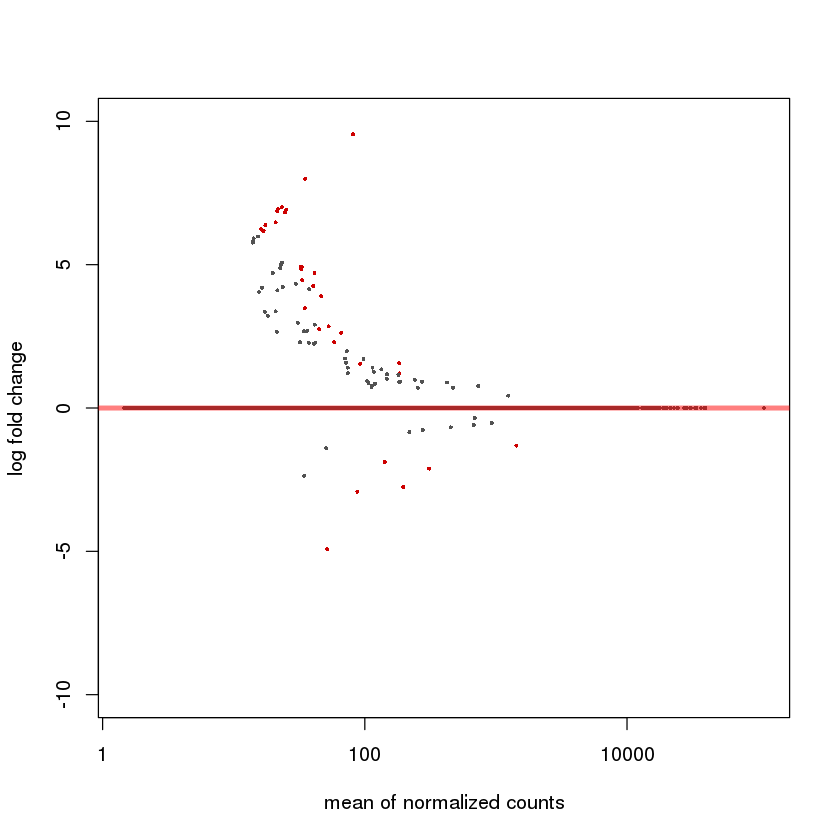

In [43]:
plotMA(resLFC.ES, ylim=c(-10,10))
#idx <- identify(res1$baseMean, res$log2FoldChange)
#rownames(res)[idx]

Number of hit genes given `FDR`

In [232]:
fdr.ES <- 0.05
FC.ES <- 2

In [234]:
sum(res.ES$padj < fdr.ES, na.rm=T)

[1] 24

In [235]:
# get significant genes by removing NA values, and select for padj < FDR, this is used to get the gene IDs
# which then used to get normalized counts for heatmap purposes
sigID.ES <- res.ES[!is.na(res.ES$padj) & res.ES$padj < fdr.ES,] %>% as.data.frame %>% rownames_to_column('gene_id')  

In [236]:
sigID.ES %>% head

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000006128.12,23.22873,7.593136,1.8459033,4.113507,3.896931e-05,3.576007e-02
ENSG00000078401.7,40.49310,4.922870,1.1863940,4.149440,3.332901e-05,3.466217e-02
ENSG00000102181.21,33.31916,5.064411,1.1814785,4.286503,1.815081e-05,2.592699e-02
ENSG00000119673.14,35.03801,8.186404,1.6776802,4.879598,1.063026e-06,2.763867e-03
ENSG00000125144.13,196.72001,-2.879285,0.4117668,-6.992515,2.700020e-12,4.212032e-08
ENSG00000127399.15,11.61909,-7.605408,1.8807389,-4.043840,5.258270e-05,3.728592e-02


In [237]:
# get the normalized counts of all genes, also add gene name in this step
# this is later joined with the list significant genes
sigGenes.ES <- counts(dds.ES, normalized=T) %>% as.data.frame %>% 
                add_column(.before=1,'gene'=mcols(dds.ES)$gene_name) %>% rownames_to_column('gene_id')# add gene_name

In [238]:
# using 'gene_id' and the previous DESeq2 results, get significant genes, and their normalized counts, and padj
sigGenes.ES <- left_join(sigID.ES[,c('gene_id','padj', 'log2FoldChange')], sigGenes.ES, by = 'gene_id') %>%
               arrange(padj)

In [241]:
sigGenes.ES %>% head
sigGenes.ES %>% dim

gene_id,gene,padj,log2FoldChange,S01,S02,S03,S04,S05,S06
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000125144.13,MT1G,4.212032e-08,-2.879285,625.6458,302.71335,56.28068,55.49202,75.124923,65.063287
ENSG00000148826.9,NKX6-2,2.747099e-05,9.399429,0.0000,0.00000,34.79169,169.80557,145.882119,136.452172
ENSG00000261780.3,LINC02582,7.051113e-05,-3.127039,191.0596,237.70760,26.60541,26.63617,31.447642,13.554851
ENSG00000205670.11,SMIM11A,1.257303e-04,-5.295755,262.3357,32.98799,2.04657,1.10984,3.494182,8.132911
ENSG00000198417.7,MT1F,1.336562e-04,-2.274482,691.9722,623.86116,69.58338,98.77579,227.995407,146.392396
ENSG00000119673.14,ACOT2,2.763867e-03,8.186404,0.0000,0.00000,35.81498,84.34787,61.148193,28.917017


[1] 24 10

In [240]:
sigGenes.ES <- sigGenes.ES[,c(1,4,2,3,5:10)] # rearrange order of columns

In [242]:
# find genes with more than 1 gene ID
multi_id_genes.ES <- sigGenes.ES %>% group_by(gene, add=F) %>% summarise(n_geneIDs=n_distinct(gene_id)) %>% filter(n_geneIDs > 1)
multi_id_genes.ES <- multi_id_genes.ES$gene

In [243]:
multi_id_genes.ES

character(0)

Significant genes, export to csv

In [300]:
sigGenes.ES <- sigGenes.ES %>% mutate(expression=case_when(padj < fdr.ES & log2FoldChange > FC.ES ~ 'Up', 
                                  padj < fdr.ES & log2FoldChange < -FC.ES ~ 'Down',
                                  padj < fdr.ES & log2FoldChange >= -FC.ES & log2FoldChange <= FC.ES ~ 'No Change',
                                  padj >= fdr.ES ~ 'No Change')) %>% arrange(expression, padj) 
 

In [249]:
sigGenes.ES %>% write.table('ES_WT_vs_ZBTB18_KO_Sig_Genes.csv', quote=F, sep=',', row.names = F)

### Heatmap

In [301]:
#### Most significant (WT vs ZBTB18) ranked by padj
most_sig.heatmap.ES <- sigGenes.ES %>% filter(!(gene %in% multi_id_genes.ES)) %>% select(-gene_id) %>%
                        top_n(-24, padj) %>% column_to_rownames('gene')

In [302]:
ano.ES = colData(dds.ES) %>% as.data.frame %>% select(condition,group)

### Top 50 of most significant genes (FDR 0.05, WT vs. ZBTB18, ES)

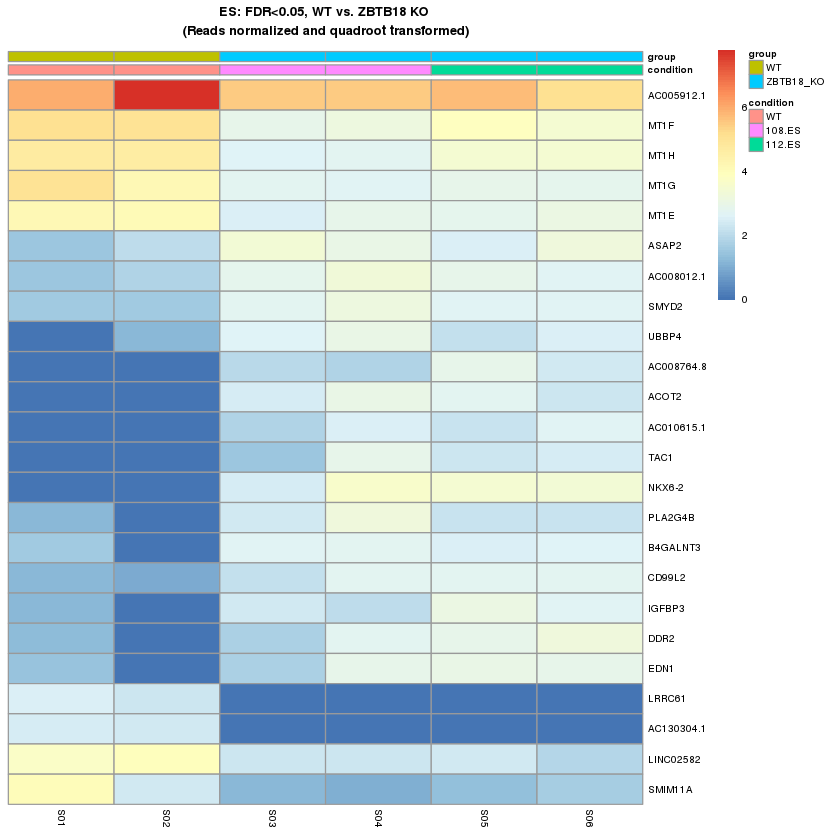

In [303]:
# quadroot transformed normalized reads because read range is large
most_sig.heatmap.ES %>% select(S01:S06) %>% as.matrix %>% apply(2,quadroot) %>%
        pheatmap(cluster_rows=T,show_rownames=T, treeheight_row = 0, cluster_cols=F, annotation_col = ano.ES, 
                 fontsize = 6, main="ES: FDR<0.05, WT vs. ZBTB18 KO \n(Reads normalized and quadroot transformed)")

#### volcano plot

In [270]:
ES.vol <- res.ES %>% as.data.frame %>% rownames_to_column('gene_id') %>% add_column(.before=1,'gene'=mcols(dds.ES)$gene_name)

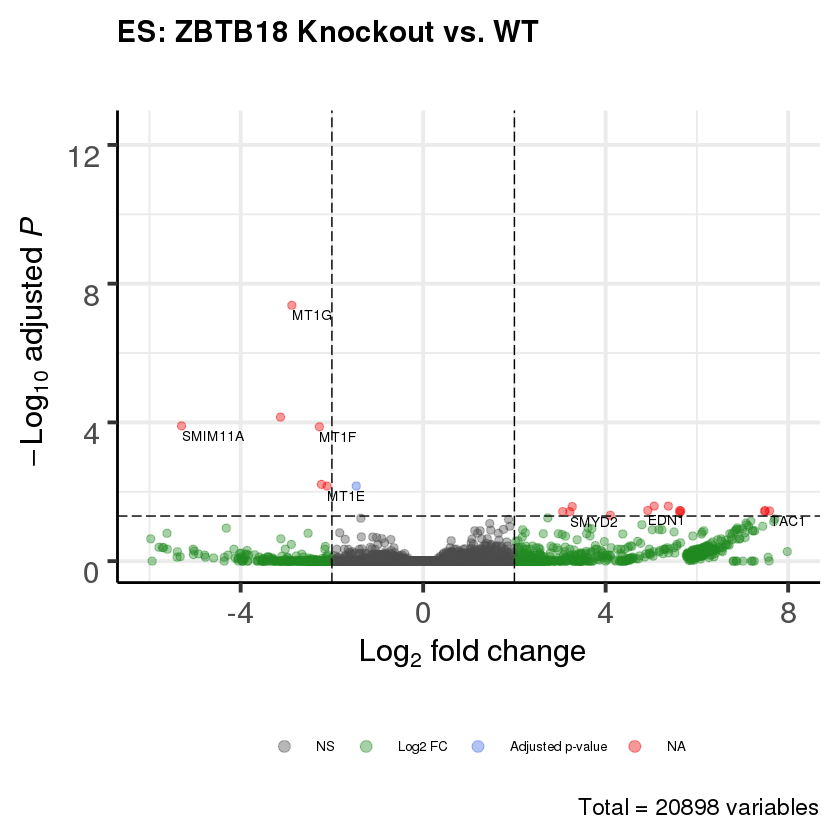

In [273]:
EnhancedVolcano(ES.vol, lab = ES.vol$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "ES: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.ES, FCcutoff = FC.ES,
                transcriptPointSize = 2, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

# Comparison 2: Day 4 WT vs. ZBTB18 Kockout.

- WT.Day4 vs. 108.Day4
- WT.Day4 vs. 112.Day4

Condition  |  Sample    
:---------:|:-------:   
WT.Day4  |  7,8    
108.Day4 |   9, 10    
112.Day4 |   11, 12

In [141]:
cols.D4 <- c('S07','S08','S09','S10','S11','S12') # relevent samples
cnts.D4 <- cnts[,cols.D4]

In [142]:
colnames(cnts.D4)
head(cnts.D4)

[1] "S07" "S08" "S09" "S10" "S11" "S12"

,S07,S08,S09,S10,S11,S12
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,739,998,1311,558,775,1346
ENSG00000000005.6,0,0,0,0,10,14
ENSG00000000419.12,390,513,515,191,407,482
ENSG00000000457.14,138,168,70,26,73,111
ENSG00000000460.17,0,70,107,42,83,51
ENSG00000000938.13,0,0,0,0,0,0


In [131]:
# get gene_names
gene_ids.D4 = rownames_to_column(cnts.D4, 'gene_id')[,1:2] # list of gene IDs specific to ES dataset
gtf_lookup$gene_id <- as.character(gtf_lookup$gene_id)
gene_names.D4 = left_join(gene_ids.D4, gtf_lookup, 'gene_id')[,c(3)] %>% as.character # join to get gene names

In [132]:
dir('.','.csv')

[1] "conditions_group1.csv"                
 [2] "conditions_group2.csv"                
 [3] "conditions_group3.csv"                
 [4] "ES_WT_vs_ZBTB18_KO_Sig_Genes.csv"     
 [5] "HitGeneCount.csv"                     
 [6] "HitGeneCountMM.csv"                   
 [7] "HS_td-VStd+_td-VSdox120.csv"          
 [8] "intersection_output.csv"              
 [9] "Mouse ESC screen.csv"                 
[10] "plot_screen_data_sqrt.csv"            
[11] "plot_screen_data.csv"                 
[12] "plot_screenMM_data.csv"               
[13] "RCmNorRatioLog2.lu.csv"               
[14] "Significant_genes_DOXvsES.csv"        
[15] "Significant_genes_WTvsZBTB18KO.csv"   
[16] "TF_Screen_FC_Pval_15HvsES.csv"        
[17] "TF_Screen_FC_Pval_1DvsES.csv"         
[18] "TF_Screen_FC_Pval_2DvsES.csv"         
[19] "TF_Screen_FC_Pval_4DvsES.csv"         
[20] "TF_Screen_FC_Pval_7DvsES.csv"         
[21] "TF_ScreenSelectedNormalizedCounts.csv"
[22] "tf.heatmap.genes.csv"                 
[23] "tf.heatmap.genes.down.csv"            
[24] "tf.heatmap.genes.up.csv"              
[25] "TFlist.csv"

In [143]:
coldata.D4 <- data.frame('condition'=c('WT.Day4','WT.Day4', '108.Day4','108.Day4', '112.Day4', '112.Day4'), 'group'=c('WT.Day4','WT.Day4','ZBTB18_KO.Day4','ZBTB18_KO.Day4', 
                                                                        'ZBTB18_KO.Day4', 'ZBTB18_KO.Day4'))

In [144]:
coldata.D4

condition,group
<fct>,<fct>
WT.Day4,WT.Day4
WT.Day4,WT.Day4
108.Day4,ZBTB18_KO.Day4
108.Day4,ZBTB18_KO.Day4
112.Day4,ZBTB18_KO.Day4
112.Day4,ZBTB18_KO.Day4


In [145]:
dds.D4 <- DESeqDataSetFromMatrix(countData = cnts.D4, colData = coldata.D4, design = ~ group) 

In [147]:
all(rownames(dds.D4) == gene_ids.D4$gene_id) # make sure all gene_ids are the same as the gene ids in dds

[1] TRUE

In [148]:
mcols(dds.D4) <- cbind(mcols(dds.D4), 'gene_name' = gene_names.D4) # adding gene_names to counts dds

In [149]:
keep.D4 <- rowSums(counts(dds.D4)) >= 10 # pre-analysis filter to remove very low read count genes
dds.D4 <- dds.D4[keep.D4,]

In [151]:
dim(dds.D4)

[1] 21198     6

In [152]:
# specify factor level (instead of letting R to decide)
dds.D4$condition <- factor(dds.D4$condition, levels = unique(as.vector(coldata.D4$condition)))
dds.D4$group <- factor(dds.D4$group, levels = unique(as.vector(coldata.D4$group)))

In [153]:
counts(dds.D4) %>% head()

,S07,S08,S09,S10,S11,S12
ENSG00000000003.14,739,998,1311,558,775,1346
ENSG00000000005.6,0,0,0,0,10,14
ENSG00000000419.12,390,513,515,191,407,482
ENSG00000000457.14,138,168,70,26,73,111
ENSG00000000460.17,0,70,107,42,83,51
ENSG00000001036.13,80,209,297,119,219,267


In [154]:
dds.D4 <- DESeq(dds.D4) # fit DESeq mdoel

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [155]:
resultsNames(dds.D4)

[1] "Intercept"                       "group_ZBTB18_KO.Day4_vs_WT.Day4"

In [156]:
res.D4 <- results(dds.D4) # modelling D0 vs. D4

In [157]:
res.D4 %>% head

log2 fold change (MLE): group ZBTB18 KO.Day4 vs WT.Day4 
Wald test p-value: group ZBTB18 KO.Day4 vs WT.Day4 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000000003.14 905.704543535641   0.52783397340963 0.196120595764585
ENSG00000000005.6  3.73504240902358   5.23141053555859  3.36909288063928
ENSG00000000419.12 389.339973553485  0.142650035976338 0.243182510483844
ENSG00000000457.14 87.2961990737973 -0.844468799309352 0.493010058540306
ENSG00000000460.17 57.4426478459087   1.58773051999421  1.04101831368886
ENSG00000001036.13  189.74837549163   1.04099343358322 0.372059883902644
                                stat              pvalue               padj
                           <numeric>           <numeric>          <numeric>
ENSG00000000003.14  2.69137451552115 0.00711582623485639  0.103927739124034
ENSG00000000005.6   1.55276530535007   0.12

#### Log fold change shrinkage LFC for visulaization and ranking (for easier/cleaner visulization)

In [158]:
resultsNames(dds.D4)

[1] "Intercept"                       "group_ZBTB18_KO.Day4_vs_WT.Day4"

In [159]:
resLFC.D4 <- lfcShrink(dds.D4, coef='group_ZBTB18_KO.Day4_vs_WT.Day4', type='apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [160]:
resLFC.ES %>% head

log2 fold change (MAP): group ZBTB18 KO vs WT 
Wald test p-value: group ZBTB18 KO vs WT 
DataFrame with 6 rows and 5 columns
                           baseMean        log2FoldChange               lfcSE
                          <numeric>             <numeric>           <numeric>
ENSG00000000003.14 913.248353963115  6.45728857990519e-06 0.00144267409946254
ENSG00000000005.6  5.19582450357961 -2.52362092038694e-07 0.00144269482356289
ENSG00000000419.12 619.189654795312 -1.49009159262246e-05 0.00144271890287719
ENSG00000000457.14 41.8450354970858  7.55430630091847e-07 0.00144269285894544
ENSG00000000460.17 125.162735704992 -7.47905784943778e-07 0.00144268778648099
ENSG00000001036.13 285.910339142177  4.78140070211583e-06 0.00144268957194288
                              pvalue              padj
                           <numeric>         <numeric>
ENSG00000000003.14 0.162786722970473  0.99946089285179
ENSG00000000005.6  0.547499179714834                NA
ENSG00000000419.12 0.2253029035

### MA-plot

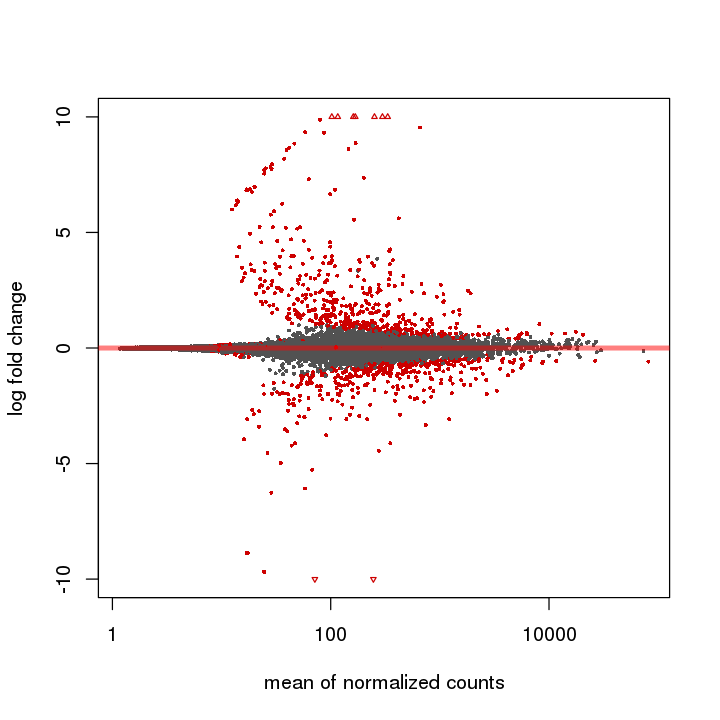

In [161]:
plotMA(resLFC.D4, ylim=c(-10,10))
#idx <- identify(res1$baseMean, res$log2FoldChange)
#rownames(res)[idx]

Number of hit genes given `FDR`

In [178]:
fdr.D4 <- 0.05
FC.D4 <- 2

In [163]:
sum(res.D4$padj < fdr, na.rm=T)

[1] 724

In [180]:
# get significant genes by removing NA values, and select for padj < FDR, this is used to get the gene IDs
# which then used to get normalized counts for heatmap purposes
sigID.D4 <- res.D4[!is.na(res.D4$padj) & res.D4$padj < fdr.D4,] %>% as.data.frame %>% rownames_to_column('gene_id') 

In [181]:
sigID.D4 %>% head
sigID.D4 %>% dim

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000003436.16,38.73538,5.630155,1.1009444,5.113932,3.155203e-07,3.118658e-05
ENSG00000005100.13,133.78502,1.305787,0.4072528,3.206330,1.344395e-03,3.370236e-02
ENSG00000006468.14,205.91225,-1.842569,0.4567557,-4.034036,5.482685e-05,2.844333e-03
ENSG00000007866.21,274.16682,2.006636,0.3528401,5.687099,1.292155e-08,1.723758e-06
ENSG00000009694.13,552.77534,2.498490,0.2893476,8.634909,5.877369e-18,3.512551e-15
ENSG00000010278.14,343.06265,3.178288,0.5606530,5.668904,1.437141e-08,1.867159e-06


[1] 724   7

In [182]:
# get the normalized counts of all genes, also add gene name in this step
# this is later joined with the list significant genes
sigGenes.D4 <- counts(dds.D4, normalized=T) %>% as.data.frame %>% 
                add_column(.before=1,'gene'=mcols(dds.D4)$gene_name) %>% rownames_to_column('gene_id')# add gene_name

In [183]:
# using 'gene_id' and the previous DESeq2 results, get significant genes, and their normalized counts, and padj
sigGenes.D4 <- left_join(sigID.D4[,c('gene_id','padj', 'log2FoldChange')], sigGenes.D4, by = 'gene_id') %>%
               arrange(padj)

In [274]:
sigGenes.D4 %>% head
sigGenes.D4 %>% dim

gene_id,gene,padj,log2FoldChange,S07,S08,S09,S10,S11,S12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000183386.10,FHL3,3.783195e-51,5.652099,11.42600,13.25360,616.4242,518.3631,700.0148,661.9278
ENSG00000103187.8,COTL1,1.811368e-34,-2.015968,5221.68185,5558.83796,1312.3605,1493.6804,1366.3332,1166.4108
ENSG00000137868.19,STRA6,1.541786e-29,3.854467,36.18233,38.36568,650.8521,390.1269,559.7944,553.9421
ENSG00000165462.5,PHOX2A,2.906620e-28,2.514652,426.57065,445.73942,2432.9081,1811.5616,2891.3654,2828.2370
ENSG00000154553.15,PDLIM3,5.621849e-26,4.331644,22.85200,27.90231,485.2701,319.6873,707.6236,537.4557
ENSG00000126878.13,AIF1L,9.679636e-26,3.156598,92.36016,56.50218,636.9170,585.1904,752.1898,658.6305


[1] 724  10

In [185]:
sigGenes.D4 <- sigGenes.D4[,c(1,4,2,3,5:10)] # rearrange order of columns

In [275]:
# find genes with more than 1 gene ID
multi_id_genes.D4 <- sigGenes.D4 %>% group_by(gene, add=F) %>% summarise(n_geneIDs=n_distinct(gene_id)) %>% filter(n_geneIDs > 1)
multi_id_genes.D4 <- multi_id_genes.D4$gene

In [276]:
multi_id_genes.D4

character(0)

Significant genes, export to csv

In [304]:
sigGenes.D4 <- sigGenes.D4 %>% mutate(expression=case_when(padj < fdr.D4 & log2FoldChange > FC.D4 ~ 'Up', 
                                  padj < fdr.D4 & log2FoldChange < -FC.D4 ~ 'Down',
                                  padj < fdr.D4 & log2FoldChange >= -FC.D4 & log2FoldChange <= FC.D4 ~ 'No Change',
                                  padj >= fdr.D4 ~ 'Not Significant')) %>% arrange(expression, padj) 

sigGenes.D4 %>% write.csv('Day4_WT_vs_ZBTB18_KO_sigGenes.csv', row.names=F, quote=F)

### Heatmap

In [305]:
#### Most significant (WT vs ZBTB18) ranked by padj
most_sig.heatmap.D4 <- sigGenes.D4 %>% filter(!(gene %in% multi_id_genes.D4)) %>% select(-gene_id) %>%
                     column_to_rownames('gene')

In [306]:
ano.D4 = colData(dds.D4) %>% as.data.frame %>% select(condition,group)

In [307]:
most_sig.heatmap.D4 %>% head

,padj,log2FoldChange,S07,S08,S09,S10,S11,S12,expression
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
COTL1,1.811368e-34,-2.015968,5221.6819,5558.8380,1312.36048,1493.68037,1366.33319,1166.410760,Down
MT1F,2.106300e-23,-2.936239,1051.1920,996.1125,140.17092,169.77745,130.43754,98.918227,Down
ACTC1,7.086586e-22,-4.203595,1074.0440,828.6986,50.00249,93.91944,27.17449,40.391609,Down
RPS10P3,1.938304e-21,-10.452771,864.5673,609.6655,0.00000,0.00000,0.00000,1.648637,Down
NSG1,4.327457e-20,-2.385753,1657.7221,1441.1544,326.24577,366.64705,265.22299,232.457834,Down
RGS10,5.900130e-20,-3.145461,3218.3232,2718.3827,341.82031,550.87365,215.22193,241.525338,Down


### Top 50 of most significant genes (FDR 0.05, WT vs. ZBTB18, Day 4)

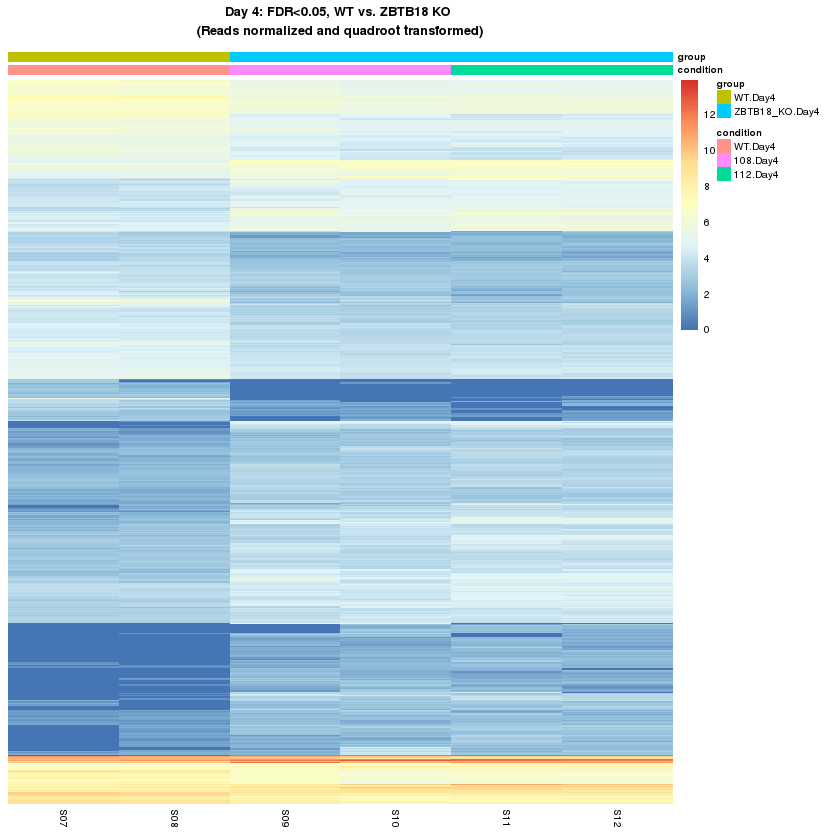

In [314]:
# quadroot transformed normalized reads because read range is large
most_sig.heatmap.D4 %>% select(S07:S12) %>% as.matrix %>% apply(2,quadroot) %>%
        pheatmap(cluster_rows=T,show_rownames=F, treeheight_row = 0, cluster_cols=F, annotation_col = ano.D4, 
                 fontsize = 6, main="Day 4: FDR<0.05, WT vs. ZBTB18 KO \n(Reads normalized and quadroot transformed)")

#### volcano plot

In [524]:
D4.vol %>% head

gene,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,ENSG00000000003.14,905.704544,0.5278340,0.1961206,2.6913745,0.007115826,0.10392774
TNMD,ENSG00000000005.6,3.735042,5.2314105,3.3690929,1.5527653,0.120479214,NA
DPM1,ENSG00000000419.12,389.339974,0.1426500,0.2431825,0.5865966,0.557474661,0.89215146
SCYL3,ENSG00000000457.14,87.296199,-0.8444688,0.4930101,-1.7128835,0.086733973,0.44016158
C1orf112,ENSG00000000460.17,57.442648,1.5877305,1.0410183,1.5251706,0.127216553,0.52429668
FUCA2,ENSG00000001036.13,189.748375,1.0409934,0.3720599,2.7979190,0.005143300,0.08435351


In [296]:
D4.vol <- res.D4 %>% as.data.frame %>% rownames_to_column('gene_id') %>% add_column(.before=1,'gene'=mcols(dds.D4)$gene_name)

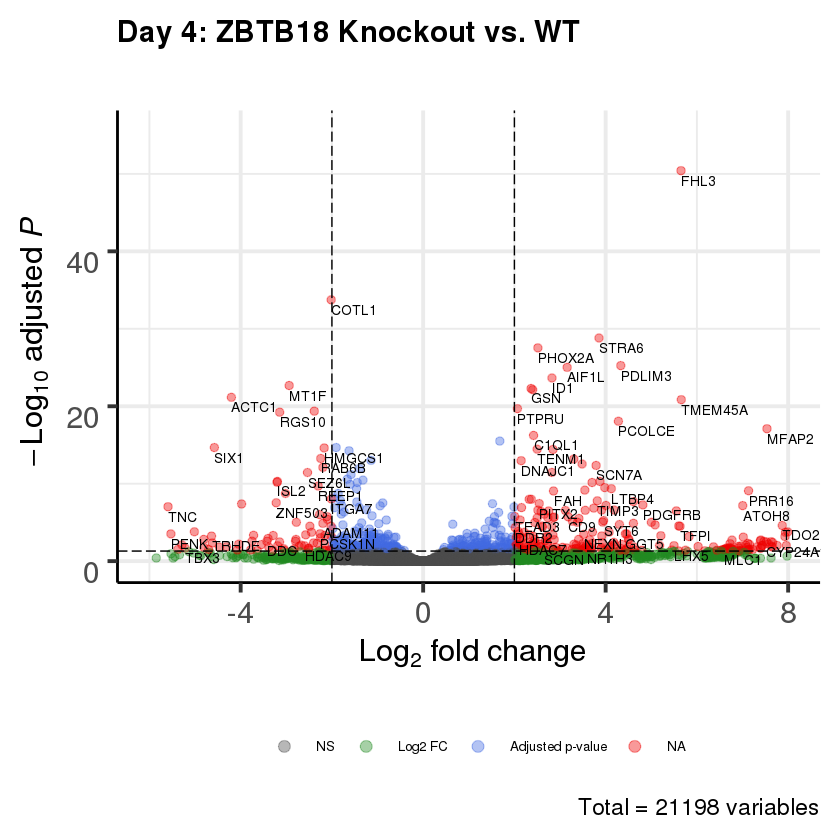

In [315]:
EnhancedVolcano(D4.vol, lab = D4.vol$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Day 4: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.D4, FCcutoff = FC.D4,
                transcriptPointSize = 2, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

# Compare significant genes sets from ES and from Day4

1. Are there overlapping genes that are significant in both dataset?

In [316]:
sigGenes.ES$gene %>% intersect(sigGenes.D4$gene)

[1] "MT1F"   "LRRC61" "CD99L2" "DDR2"

In [318]:
sigGenes.ES %>% filter(gene %in% c('MT1F', 'LRRC61', 'CD99L2', 'DDR2'))
sigGenes.D4 %>% filter(gene %in% c('MT1F', 'LRRC61', 'CD99L2', 'DDR2'))

gene_id,gene,padj,log2FoldChange,S01,S02,S03,S04,S05,S06,expression
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000198417.7,MT1F,0.0001336562,-2.274482,691.972161,623.8611610,69.583381,98.77579,227.99541,146.39240,Down
ENSG00000127399.15,LRRC61,0.0372859167,-7.605408,41.577726,28.1368175,0.000000,0.00000,0.00000,0.00000,Down
ENSG00000102181.21,CD99L2,0.0259269852,5.064411,1.979892,0.9702351,20.465700,61.04122,58.52756,56.93038,Up
ENSG00000162733.18,DDR2,0.0259269852,5.374731,2.969838,0.0000000,9.209565,56.60186,74.25138,104.82418,Up


gene_id,gene,padj,log2FoldChange,S07,S08,S09,S10,S11,S12,expression
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000198417.7,MT1F,2.106300e-23,-2.9362387,1051.19197,996.11251,140.1709,169.7775,130.4375,98.91823,Down
ENSG00000127399.15,LRRC61,2.635136e-02,-6.9561779,29.51717,19.53162,0.0000,0.0000,0.0000,0.00000,Down
ENSG00000102181.21,CD99L2,4.797799e-02,-0.8621321,568.44348,453.41256,225.4211,254.6662,311.9631,330.55174,No Change
ENSG00000162733.18,DDR2,4.776201e-05,2.0163605,55.22567,55.10706,205.7480,158.9406,218.4829,306.64650,Up


# Gene Ontology Enrichment Analysis

In [319]:
library(readxl)

In [326]:
D4.Dn.BioProc <- read_excel('TF_GO_Enrichment.xlsx', 'D4.Dn.BioProc')

In [359]:
colnames(D4.Dn.BioProc) <- sapply(colnames(D4.Dn.BioProc), function(x) {str_replace_all(x, ' ', '.')}) %>% as.vector

In [360]:
D4.Dn.BioProc %>% head
D4.Dn.BioProc %>% colnames

Enrichment.FDR,Genes.in.list,Total.genes,Functional.Category,Genes
<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0001513147,4,14,Ectodermal placode development,NRP1 SIX4 SIX1 TBX3
0.0001513147,3,4,Pattern specification involved in metanephros development,IRX1 IRX2 FOXD1
0.0001850792,28,2474,Nervous system development,SYNGR3 CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SEZ6L SIX4 HMGCS1 NRN1 SIX1 FGF13 TBX3 ASTN1 HOXB2 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A PCDHB12 PCDHAC1
0.0001850792,8,178,Muscle cell development,SIX1 SIX4 TBX3 ACTC1 DNER MEGF10 HDAC9 AKAP6
0.0001850792,3,5,Trigeminal ganglion development,NRP1 SIX4 SIX1
0.0001910598,4,19,Nephron tubule formation,SIX4 SIX1 IRX1 IRX2


[1] "Enrichment.FDR"      "Genes.in.list"       "Total.genes"        
[4] "Functional.Category" "Genes"

In [476]:
categories.keep <- c('Ectodermal placode development', 'Pattern specification involved in metanephros development', 'Nervous system development', 'Synapse organization', 'Neurogenesis', 'Generation of neurons', 'Developmental growth involved in morphogenesis',
                    'Axon development', 'Cell development', 'Regulation of neuron differentiation', 'Tube morphogenesis')

In [477]:
D4.Dn.BioProc %>% head(20)

Enrichment.FDR,Genes.in.list,Total.genes,Functional.Category,Genes
<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0001513147,4,14,Ectodermal placode development,NRP1 SIX4 SIX1 TBX3
0.0001513147,3,4,Pattern specification involved in metanephros development,IRX1 IRX2 FOXD1
0.0001850792,28,2474,Nervous system development,SYNGR3 CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SEZ6L SIX4 HMGCS1 NRN1 SIX1 FGF13 TBX3 ASTN1 HOXB2 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A PCDHB12 PCDHAC1
0.0001850792,8,178,Muscle cell development,SIX1 SIX4 TBX3 ACTC1 DNER MEGF10 HDAC9 AKAP6
0.0001850792,3,5,Trigeminal ganglion development,NRP1 SIX4 SIX1
0.0001910598,4,19,Nephron tubule formation,SIX4 SIX1 IRX1 IRX2
0.0002148396,3,6,Cranial ganglion development,NRP1 SIX4 SIX1
0.0002890158,11,434,Synapse organization,NLGN1 TNC NRP1 SEZ6L SIX4 SIX1 NTRK3 ZNF804A SNCG NTNG2 DNER
0.0005390154,21,1683,Neurogenesis,CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SIX4 NRN1 SIX1 ASTN1 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A FGF13


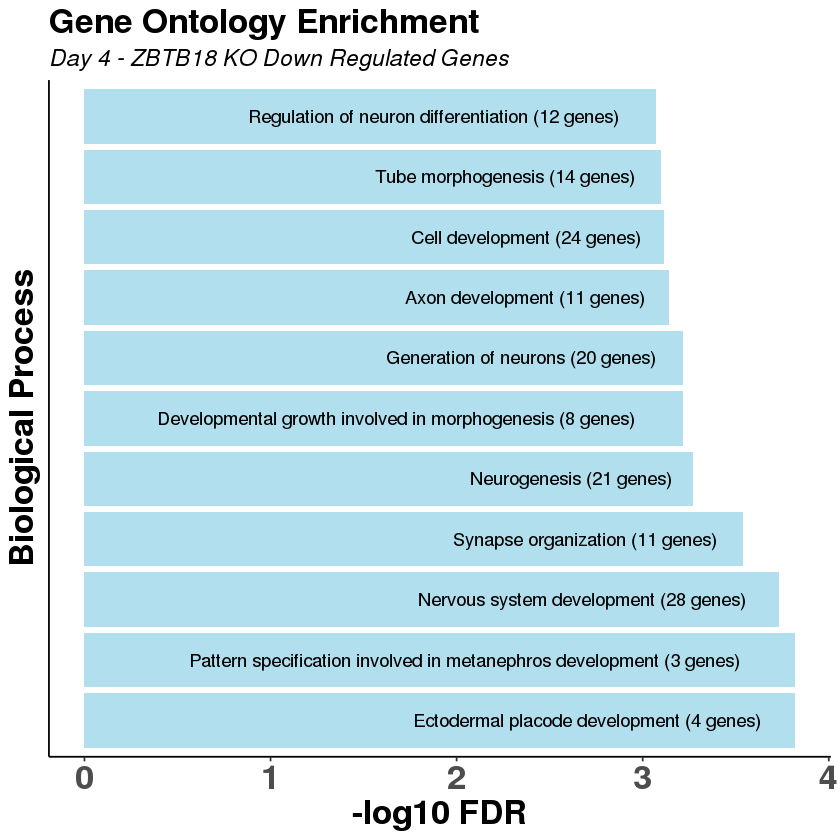

In [492]:
D4.Dn.BioProc %>% filter(Functional.Category %in% categories.keep) %>%
    ggplot(aes(x=reorder(Functional.Category, Enrichment.FDR), y=-log10(Enrichment.FDR))) + theme_classic() + geom_bar(stat='identity', fill='lightblue2') + coord_flip() +
            geom_text(aes(label=paste0(Functional.Category, ' (', Genes.in.list, ' genes)')), hjust=1.1) + 
            labs(title="Gene Ontology Enrichment", x="Biological Process", y="-log10 FDR", subtitle='Day 4 - ZBTB18 KO Down Regulated Genes') +
            theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(size=20, face = 'bold'),
                  axis.title.x = element_text(size=20, face='bold'), axis.title.y = element_text(size=20, face='bold'), 
                  plot.title = element_text(size=20, face='bold'), plot.subtitle = element_text(size=14, face='italic')) 
            

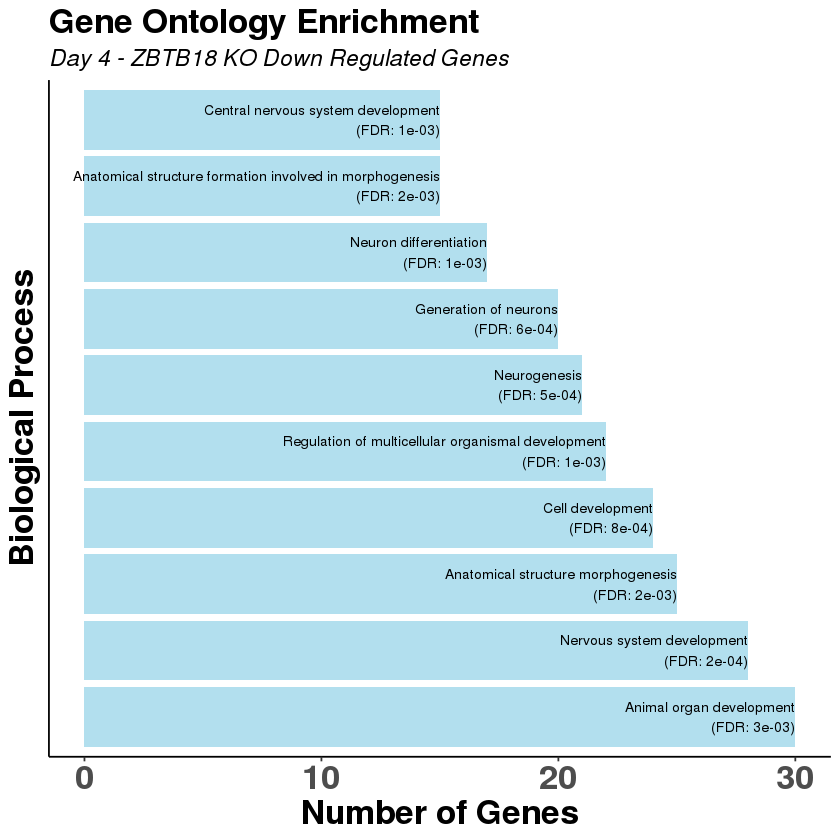

In [523]:
D4.Dn.BioProc %>% top_n(10, Genes.in.list) %>%
    ggplot(aes(x=reorder(Functional.Category, -Genes.in.list), y=Genes.in.list)) + theme_classic() + geom_bar(stat='identity', fill='lightblue2') + coord_flip() +
            geom_text(aes(label=paste0(Functional.Category, "\n(FDR: ", formatC(Enrichment.FDR, format = 'e', digits=0), ')')), hjust=1, size=3) + 
            labs(title="Gene Ontology Enrichment", x="Biological Process", y="Number of Genes", subtitle='Day 4 - ZBTB18 KO Down Regulated Genes') +
            theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(size=20, face = 'bold'),
                  axis.title.x = element_text(size=20, face='bold'), axis.title.y = element_text(size=20, face='bold'), 
                  plot.title = element_text(size=20, face='bold'), plot.subtitle = element_text(size=14, face='italic')) 
            

## ES

## Day 4

# Other

In [955]:
data.frame(tf.heatmap.genes.3e) %>% cbind.fill(tf.heatmap.genes.3d)

ERROR: Error in cbind.fill(., tf.heatmap.genes.3d): could not find function "cbind.fill"


In [956]:
?rbind.fill